# Model Search
COMP9417 Major Assignment  
Purpose: Perform a model search on the Student Life data set to get an indication on how the models will perform and serve as a benchmark  
Author: Andrew Lau

In [38]:
# globals
CV_FOLDS = 10
N_JOBS = 1

In [39]:
# import modules
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.decomposition import PCA
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.pipeline import Pipeline
import sklearn 
print (sklearn.__version__)

import warnings
warnings.simplefilter(action='once', category=FutureWarning)

0.20.1


In [40]:
# import data
def import_data(data):    
    return pd.read_csv("train_test_data/" + data + ".csv", index_col="uid").drop("Unnamed: 0", axis="columns")        
X_train = import_data("X_train")
X_test = import_data("X_test")
y_train = import_data("y_train")
y_test = import_data("y_test")

In [41]:
X_train.head()
X_test.head()
y_train.head()
y_test.head()

,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u00,75,65,60,47,31,18,12,7,3,1,...,10751.25,10827.5,10827.50,10924.25,10880.75,10848.50,10473.0,9785.0,9555.50,6308.0
u01,44,39,36,29,23,19,12,10,5,3,...,21632.50,21658.0,21624.00,24227.00,25298.00,23310.00,20985.0,21298.0,15541.25,9186.5
u02,105,98,88,76,62,49,38,30,19,4,...,14639.50,14191.5,14451.00,14502.50,14896.00,17611.75,14191.5,14777.5,18333.00,14254.5
u04,60,54,46,41,31,23,14,8,2,0,...,22332.00,22375.5,22700.75,22718.00,23324.00,23942.00,24879.0,25229.0,26646.00,NaN
u08,107,102,92,79,62,50,38,28,17,6,...,10007.50,10044.5,9948.00,9989.00,9918.00,9761.00,9903.0,9933.0,9989.00,8869.5


,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u03,47,41,37,30,21,10,6,1,0,0,...,24734.50,28016.00,28016.00,24631.00,25801.00,17806.00,16529.50,17806.0,5735.0,NaN
u27,73,67,52,47,38,31,19,18,12,8,...,13938.00,14609.75,13951.00,14491.00,14349.50,18096.25,18459.25,19254.0,19097.5,18793.25
u05,72,68,61,48,38,29,18,14,10,4,...,18138.25,18786.25,19550.75,20192.00,25011.50,22830.50,17359.75,17141.5,17448.5,16834.25
u43,69,69,57,49,44,35,25,21,14,7,...,16965.25,16965.25,17061.00,17221.25,17900.75,21970.00,24245.25,22225.0,18883.0,9766.50
u56,39,32,21,18,15,13,9,9,6,3,...,20992.00,21379.75,22694.75,23458.00,23239.25,25084.25,24099.00,24099.0,26136.0,24657.50


,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
uid,,,,,,,,,,,,,,,,,,,,,
u00,32.0,NaN,NaN,32.0,33.0,49.0,1.0,NaN,NaN,1.0,...,45.0,31.0,24.0,45.0,1.0,1.0,1.0,1.0,1.0,1.0
u01,30.0,19.0,45.0,30.0,19.0,45.0,1.0,1.0,1.0,1.0,...,46.0,27.0,17.0,46.0,0.0,0.0,1.0,0.0,0.0,1.0
u02,23.0,15.0,46.0,23.0,15.0,46.0,0.0,0.0,1.0,0.0,...,44.0,28.0,13.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0
u04,27.0,14.0,27.0,27.0,14.0,27.0,0.0,0.0,0.0,0.0,...,33.0,34.0,19.0,33.0,1.0,1.0,0.0,1.0,1.0,0.0
u08,30.0,26.0,NaN,30.0,26.0,38.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
uid,,,,,,,,,,,,,,,,,,,,,
u03,30.0,27.0,34.0,30.0,27.0,34.0,1.0,1.0,0.0,1.0,...,31.0,25.0,20.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u27,23.0,18.0,31.0,23.0,18.0,31.0,0.0,0.0,0.0,0.0,...,31.0,19.0,23.0,31.0,0.0,1.0,0.0,0.0,1.0,0.0
u05,32.0,27.0,48.0,32.0,27.0,48.0,1.0,1.0,1.0,1.0,...,50.0,33.0,17.0,50.0,1.0,0.0,1.0,1.0,0.0,1.0
u43,31.0,18.0,47.0,31.0,18.0,47.0,1.0,0.0,1.0,1.0,...,42.0,32.0,21.0,42.0,1.0,1.0,0.0,1.0,1.0,0.0
u56,22.0,9.0,46.0,22.0,9.0,46.0,0.0,0.0,1.0,0.0,...,48.0,29.0,15.0,48.0,1.0,0.0,1.0,1.0,0.0,1.0


# EDA

In [42]:
y_train.describe()

,panas_pos_raw_pre,panas_neg_raw_pre,flourishing_scale_raw_pre,panas_pos_imp_pre,panas_neg_imp_pre,flourishing_scale_imp_pre,panas_pos_raw_class_pre,panas_neg_raw_class_pre,flourishing_scale_raw_class_pre,panas_pos_imp_class_pre,...,flourishing_scale_raw_post,panas_pos_imp_post,panas_neg_imp_post,flourishing_scale_imp_post,panas_pos_raw_class_post,panas_neg_raw_class_post,flourishing_scale_raw_class_post,panas_pos_imp_class_post,panas_neg_imp_class_post,flourishing_scale_imp_class_post
count,36.000000,34.000000,33.000000,37.000000,37.000000,37.000000,36.000000,34.000000,33.000000,37.000000,...,28.000000,30.000000,30.000000,28.000000,29.000000,30.000000,28.000000,30.000000,30.000000,28.000000
mean,28.500000,19.382353,42.636364,28.513514,19.810811,42.972973,0.527778,0.441176,0.545455,0.540541,...,43.178571,29.600000,21.766667,43.178571,0.517241,0.566667,0.500000,0.533333,0.566667,0.500000
std,6.235841,7.781153,9.266263,6.149172,7.978575,9.114965,0.506309,0.503995,0.505650,0.505228,...,9.412575,6.881259,8.067317,9.412575,0.508548,0.504007,0.509175,0.507416,0.504007,0.509175
min,13.000000,10.000000,15.000000,13.000000,10.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,17.000000,11.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,14.000000,41.000000,26.000000,14.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,40.500000,25.250000,15.000000,40.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,17.500000,45.000000,29.000000,18.000000,45.000000,1.000000,0.000000,1.000000,1.000000,...,44.500000,31.000000,20.000000,44.500000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000
75%,32.250000,21.750000,49.000000,32.000000,25.000000,49.000000,1.000000,1.000000,1.000000,1.000000,...,48.250000,34.000000,27.500000,48.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,42.000000,43.000000,54.000000,42.000000,43.000000,56.000000,1.000000,1.000000,1.000000,1.000000,...,56.000000,43.000000,37.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
y_train.columns

Index(['panas_pos_raw_pre', 'panas_neg_raw_pre', 'flourishing_scale_raw_pre',
       'panas_pos_imp_pre', 'panas_neg_imp_pre', 'flourishing_scale_imp_pre',
       'panas_pos_raw_class_pre', 'panas_neg_raw_class_pre',
       'flourishing_scale_raw_class_pre', 'panas_pos_imp_class_pre',
       'panas_neg_imp_class_pre', 'flourishing_scale_imp_class_pre',
       'panas_pos_raw_post', 'panas_neg_raw_post',
       'flourishing_scale_raw_post', 'panas_pos_imp_post',
       'panas_neg_imp_post', 'flourishing_scale_imp_post',
       'panas_pos_raw_class_post', 'panas_neg_raw_class_post',
       'flourishing_scale_raw_class_post', 'panas_pos_imp_class_post',
       'panas_neg_imp_class_post', 'flourishing_scale_imp_class_post'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7CFE0DCF8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7CFE0D4A8>]],
      dtype=object)

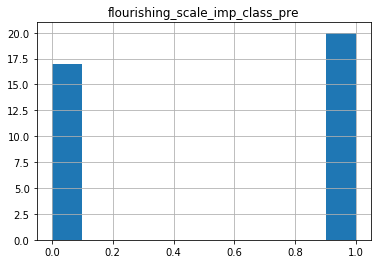

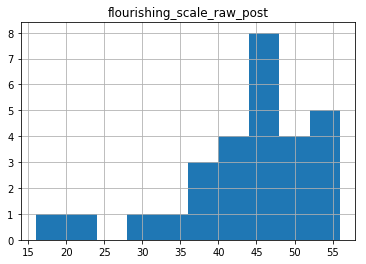

In [44]:
y_train.loc[:, ['flourishing_scale_imp_class_pre']].hist()
y_train.loc[:, ['flourishing_scale_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7DF383C18>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7DF383CF8>]],
      dtype=object)

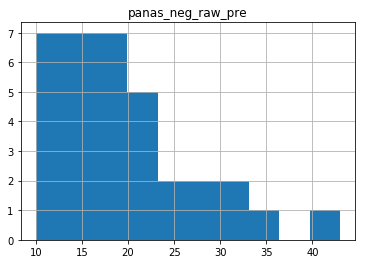

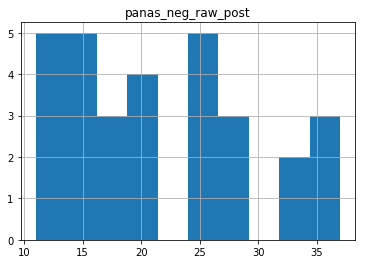

In [45]:
y_train.loc[:, ['panas_neg_raw_pre']].hist()
y_train.loc[:, ['panas_neg_raw_post']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7DF392908>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7DF308940>]],
      dtype=object)

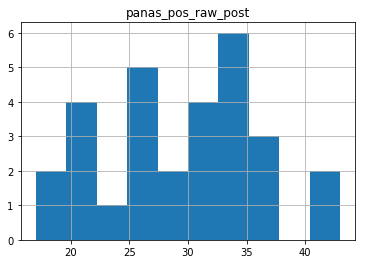

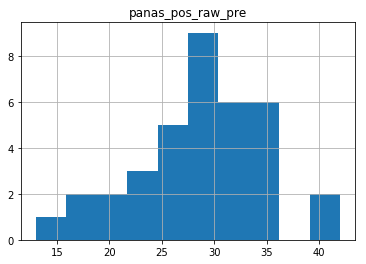

In [46]:
y_train.loc[:, ['panas_pos_raw_post']].hist()
y_train.loc[:, ['panas_pos_raw_pre']].hist()

# Pre-processing

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy="most_frequent")
scaler = StandardScaler()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

X_train.head()
X_train.describe()

,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
uid,,,,,,,,,,,,,,,,,,,,,
u00,0.149578,0.005453,0.097421,-0.065757,-0.398165,-0.670268,-0.717292,-0.725266,-0.786524,-0.783586,...,-1.129280,-1.019613,-1.069367,-1.066339,-1.047293,-0.853462,-0.960050,-0.971949,-0.782509,-0.856141
u01,-0.764098,-0.804640,-0.722965,-0.762011,-0.762201,-0.615215,-0.717292,-0.506042,-0.580223,-0.315773,...,1.466773,1.398415,1.496193,2.045637,1.952432,1.309335,1.088052,1.122392,0.207334,-0.412730
u02,1.033780,1.033647,1.054538,1.055984,1.012476,1.036369,0.922232,0.955451,0.863887,-0.081867,...,-0.201620,-0.268563,-0.208319,-0.229262,-0.211860,0.320356,-0.235558,-0.063759,0.668996,0.367957
u04,-0.292524,-0.337279,-0.381138,-0.297842,-0.398165,-0.395004,-0.591175,-0.652191,-0.889675,-1.017492,...,1.633660,1.558605,1.752060,1.692629,1.541712,1.419023,1.846738,1.837484,2.043688,-1.055125
u08,1.092727,1.158277,1.191269,1.172026,1.012476,1.091422,0.922232,0.809302,0.657586,0.385945,...,-1.306724,-1.194427,-1.278361,-1.285127,-1.247607,-1.042207,-1.071106,-0.945026,-0.710823,-0.461561


,chargetime_count_wk_1,chargetime_count_wk_2,chargetime_count_wk_3,chargetime_count_wk_4,chargetime_count_wk_5,chargetime_count_wk_6,chargetime_count_wk_7,chargetime_count_wk_8,chargetime_count_wk_9,chargetime_count_wk_10,...,locktime_q3_wk_1,locktime_q3_wk_2,locktime_q3_wk_3,locktime_q3_wk_4,locktime_q3_wk_5,locktime_q3_wk_6,locktime_q3_wk_7,locktime_q3_wk_8,locktime_q3_wk_9,locktime_q3_wk_10
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,...,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,7.771561e-17,-9.992007e-17,5.551115e-17,-1.554312e-16,0.000000,0.000000,-2.220446e-17,-5.551115e-17,-5.551115e-18,7.771561e-17,...,1.547373e-16,-5.342948e-17,-6.938894e-19,7.979728e-17,1.304512e-16,1.249001e-17,-1.486224e-16,8.326673e-17,-2.220446e-17,-1.387779e-16
std,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739,1.012739,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,...,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00
min,-2.031455e+00,-1.988622e+00,-1.953544e+00,-1.883752e+00,-1.808805,-1.661219,-1.473995e+00,-1.236788e+00,-1.095976e+00,-1.017492e+00,...,-1.524786e+00,-1.358356e+00,-1.532981e+00,-1.583160e+00,-1.522461e+00,-1.346628e+00,-1.440513e+00,-1.516591e+00,-1.531744e+00,-1.055125e+00
25%,-6.535729e-01,-6.878001e-01,-7.315107e-01,-6.556385e-01,-0.500550,-0.532636,-7.172919e-01,-7.252657e-01,-7.865241e-01,-7.835855e-01,...,-8.684519e-01,-8.900244e-01,-9.242054e-01,-8.374632e-01,-7.732449e-01,-9.137193e-01,-8.994325e-01,-8.706589e-01,-7.258611e-01,-9.965697e-01
50%,-8.620972e-02,-1.191771e-01,-1.076756e-01,-1.624591e-01,-0.193394,-0.174793,-1.497642e-01,-1.406687e-01,-6.446919e-02,-8.186715e-02,...,9.016846e-03,2.290379e-02,1.831970e-02,-1.020014e-01,-2.315217e-01,-2.241180e-01,-7.779019e-02,-7.963039e-02,-3.465980e-02,-2.395475e-01
75%,5.106268e-01,4.650245e-01,4.563396e-01,5.241240e-01,0.534678,0.554657,5.123513e-01,3.343164e-01,4.770720e-01,3.859451e-01,...,4.040910e-01,4.200014e-01,5.257315e-01,6.008849e-01,4.569393e-01,6.590117e-01,8.449104e-01,6.827585e-01,7.091797e-01,7.328453e-01
max,2.477977e+00,2.498046e+00,2.490213e+00,2.641895e+00,2.787152,2.632902,3.192343e+00,3.878436e+00,3.958408e+00,3.894537e+00,...,2.819702e+00,3.110213e+00,2.451104e+00,2.503447e+00,2.037323e+00,2.280567e+00,2.259544e+00,2.297173e+00,2.279666e+00,2.309932e+00


# Model Search

In [48]:
# model list classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

models_clf = [RandomForestClassifier(n_estimators=100), KNeighborsClassifier(), SVC(gamma="auto", probability=True), GaussianProcessClassifier(),
          DecisionTreeClassifier(), AdaBoostClassifier(n_estimators=100), GaussianNB(),
          QuadraticDiscriminantAnalysis(), MLPClassifier(), XGBClassifier(), LogisticRegression(solver="lbfgs")]

In [49]:
# model list regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

models_reg = [RandomForestRegressor(n_estimators=100), KNeighborsRegressor(), SVR(gamma="auto"), GaussianProcessRegressor(),
          DecisionTreeRegressor(), AdaBoostRegressor(n_estimators=100), MLPRegressor(max_iter=5000), XGBRegressor(objective="reg:squarederror")]

In [50]:
def model_search(model_list, X, y, target, scoring, bigger_score_is_better=True, cv_folds=CV_FOLDS, n_jobs=N_JOBS):
    """
    searches across a grid of models
    """
    model_results = []

    target_not_null = np.logical_not(y_train.loc[:, target].isnull())

    for model in model_list:
        scores = cross_val_score(estimator=model,
                                 X=X_train[target_not_null],
                                 y=y_train[target_not_null].loc[:, target], 
                                 scoring=scoring,
                                 cv=cv_folds, 
                                 n_jobs=n_jobs)

        model_results.append([str(model.__class__), np.mean(scores), np.std(scores)])
    
    return pd.DataFrame(model_results, columns=['model_' + target, 'CV_score_' + scoring, 'std']).sort_values('CV_score_' + scoring, ascending=not bigger_score_is_better)

# Model Search - Flourishing Scale

In [51]:
%%capture
# classification
model_search_flour_class_pre = model_search(models_clf, X_train, y_train, "flourishing_scale_imp_class_pre", "neg_log_loss")
model_search_flour_class_post = model_search(models_clf, X_train, y_train, "flourishing_scale_imp_class_post", "neg_log_loss")

#regression
model_search_flour_pre = model_search(models_reg, X_train, y_train, "flourishing_scale_imp_pre", "neg_mean_squared_error")
model_search_flour_post = model_search(models_reg, X_train, y_train, "flourishing_scale_imp_post", "neg_mean_squared_error")

In [52]:
df = pd.DataFrame({'text': ['foo foo foo foo foo foo foo foo', 'bar bar bar bar bar'],
                 'number': [1, 2]})

df.style.set_properties(subset=['text'], **{'width': '300px'})

,text,number
0,foo foo foo foo foo foo foo foo,1
1,bar bar bar bar bar,2


In [53]:
# model_search_flour_class_pre
model_search_flour_class_post
# model_search_flour_pre
model_search_flour_post

,model_flourishing_scale_imp_class_post,CV_score_neg_log_loss,std
9,<class 'xgboost.sklearn.XGBClassifier'>,-0.596505,0.183204
10,<class 'sklearn.linear_model.logistic.Logistic...,-0.673362,0.411111
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.674880,0.142415
3,<class 'sklearn.gaussian_process.gpc.GaussianP...,-0.693147,0.000000
1,<class 'sklearn.neighbors.classification.KNeig...,-0.726639,0.150441
2,<class 'sklearn.svm.classes.SVC'>,-0.748413,0.055526
8,<class 'sklearn.neural_network.multilayer_perc...,-0.776776,0.466596
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-2.057285,2.577437
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,-9.498323,8.146085
6,<class 'sklearn.naive_bayes.GaussianNB'>,-11.365097,6.703278


,model_flourishing_scale_imp_post,CV_score_neg_mean_squared_error,std
1,<class 'sklearn.neighbors.regression.KNeighbor...,-79.763333,66.120698
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-82.787992,83.986742
2,<class 'sklearn.svm.classes.SVR'>,-85.467658,85.961592
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-94.167372,79.190334
7,<class 'xgboost.sklearn.XGBRegressor'>,-117.356846,102.107234
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-177.800000,130.655969
6,<class 'sklearn.neural_network.multilayer_perc...,-1091.262682,360.372214
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-1990.333333,377.412735


## Model Search - PANAs

In [54]:
%%capture
# panas regression
model_search_panas_pos_pre = model_search(models_reg, X_train, y_train, "panas_pos_imp_pre", "neg_mean_squared_error")
model_search_panas_pos_post = model_search(models_reg, X_train, y_train, "panas_pos_imp_post", "neg_mean_squared_error")
model_search_panas_neg_pre = model_search(models_reg, X_train, y_train, "panas_neg_imp_pre", "neg_mean_squared_error")
model_search_panas_neg_post = model_search(models_reg, X_train, y_train, "panas_neg_imp_post", "neg_mean_squared_error")

# panas regression
model_search_panas_pos_class_pre = model_search(models_clf, X_train, y_train, "panas_pos_imp_class_pre", "neg_mean_squared_error")
model_search_panas_pos_class_post = model_search(models_clf, X_train, y_train, "panas_pos_imp_class_post", "neg_mean_squared_error")
model_search_panas_neg_class_pre = model_search(models_clf, X_train, y_train, "panas_neg_imp_class_pre", "neg_mean_squared_error")
model_search_panas_neg_class_post = model_search(models_clf, X_train, y_train, "panas_neg_imp_class_post", "neg_mean_squared_error")

In [55]:
# model_search_panas_pos_pre
model_search_panas_pos_post 
# model_search_panas_neg_pre
model_search_panas_neg_post

,model_panas_pos_imp_post,CV_score_neg_mean_squared_error,std
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-50.358410,22.188271
7,<class 'xgboost.sklearn.XGBRegressor'>,-54.176824,25.905802
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-56.117604,22.744026
2,<class 'sklearn.svm.classes.SVR'>,-56.648800,24.014415
1,<class 'sklearn.neighbors.regression.KNeighbor...,-60.038667,32.643276
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-85.133333,55.242938
6,<class 'sklearn.neural_network.multilayer_perc...,-622.745779,230.568387
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-921.933333,232.915855


,model_panas_neg_imp_post,CV_score_neg_mean_squared_error,std
0,<class 'sklearn.ensemble.forest.RandomForestRe...,-59.002427,34.913466
7,<class 'xgboost.sklearn.XGBRegressor'>,-61.583731,41.763242
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-62.880365,46.313765
2,<class 'sklearn.svm.classes.SVR'>,-72.726779,47.475281
1,<class 'sklearn.neighbors.regression.KNeighbor...,-77.729333,57.431202
4,<class 'sklearn.tree.tree.DecisionTreeRegressor'>,-142.500000,58.329571
6,<class 'sklearn.neural_network.multilayer_perc...,-449.897426,236.725593
3,<class 'sklearn.gaussian_process.gpr.GaussianP...,-536.700000,201.363378


In [57]:
# model_search_panas_pos_class_pre
model_search_panas_pos_class_post 
# model_search_panas_neg_class_pre
model_search_panas_neg_class_post

,model_panas_pos_imp_class_post,CV_score_neg_mean_squared_error,std
6,<class 'sklearn.naive_bayes.GaussianNB'>,-0.400000,0.181812
10,<class 'sklearn.linear_model.logistic.Logistic...,-0.400000,0.364768
8,<class 'sklearn.neural_network.multilayer_perc...,-0.441667,0.329246
7,<class 'sklearn.discriminant_analysis.Quadrati...,-0.450000,0.256038
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-0.466667,0.355903
1,<class 'sklearn.neighbors.classification.KNeig...,-0.491667,0.191667
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.500000,0.378227
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,-0.508333,0.155680
2,<class 'sklearn.svm.classes.SVC'>,-0.575000,0.237024
9,<class 'xgboost.sklearn.XGBClassifier'>,-0.633333,0.244949


,model_panas_neg_imp_class_post,CV_score_neg_mean_squared_error,std
5,<class 'sklearn.ensemble.weight_boosting.AdaBo...,-0.350000,0.265623
6,<class 'sklearn.naive_bayes.GaussianNB'>,-0.408333,0.284922
4,<class 'sklearn.tree.tree.DecisionTreeClassifi...,-0.416667,0.368932
2,<class 'sklearn.svm.classes.SVC'>,-0.433333,0.081650
9,<class 'xgboost.sklearn.XGBClassifier'>,-0.433333,0.280872
1,<class 'sklearn.neighbors.classification.KNeig...,-0.458333,0.250693
0,<class 'sklearn.ensemble.forest.RandomForestCl...,-0.475000,0.129368
7,<class 'sklearn.discriminant_analysis.Quadrati...,-0.491667,0.205649
3,<class 'sklearn.gaussian_process.gpc.GaussianP...,-0.558333,0.197379
8,<class 'sklearn.neural_network.multilayer_perc...,-0.558333,0.190212
